In [55]:
from source import data_wrangle
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sb
%matplotlib inline

In [2]:
advanced = data_wrangle.read_all_advanced('./data/advanced')
pergame  = data_wrangle.read_all_pergame('./data/per_game')
seasonal = data_wrangle.clean_and_join_seasonal_dataframe(advanced, pergame)
demographic = data_wrangle.read_demographic_data('./data/player_data.csv')
joined = data_wrangle.add_years_in_league(seasonal, demographic)

In [3]:
joined[joined['Seasons_number']<1]

Empty DataFrame
Columns: [Player, Pos, Age, Tm, G, MP_total, PER, TS%, 3PAr, FTr, ORB%, DRB%, TRB%, AST%, STL%, BLK%, TOV%, USG%, OWS, DWS, WS, WSp48, OBPM, DBPM, BPM, VORP, Season, Teams, GS, MP_pergame, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PS/G, Seasons_number]
Index: []

[0 rows x 53 columns]

Text(0.5, 1.0, 'Number of Seasons Played in Data (Adjusted for Rookie Year)')

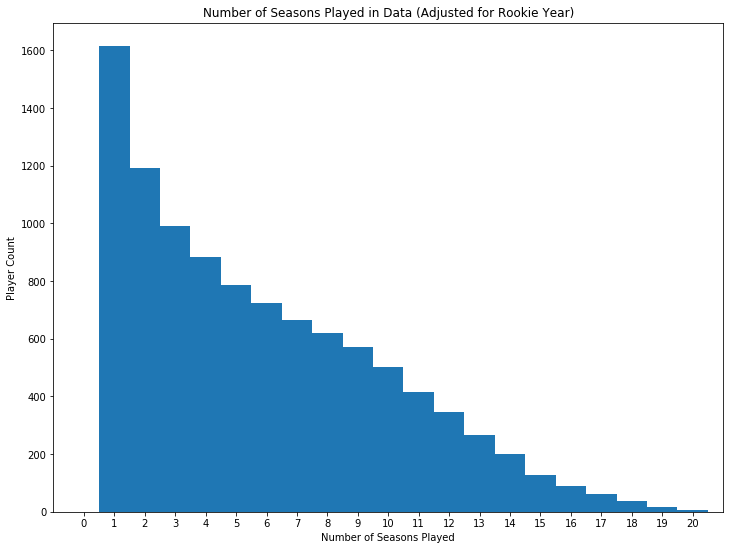

In [17]:
data = joined['Seasons_number']
bins = np.arange(22) - 0.5
plt.figure(figsize=(12,9))
plt.hist(data, bins)
plt.xticks(range(21))
plt.xlim([-1,21])
plt.xlabel('Number of Seasons Played')
plt.ylabel('Player Count')
plt.title('Number of Seasons Played in Data (Adjusted for Rookie Year)')

Let's get rid of the players that played less than 4 years, as we aren't really concerned about predicting them

Text(0.5, 1.0, 'Number of Seasons Played--4 years+ (Adjusted for Rookie Year)')

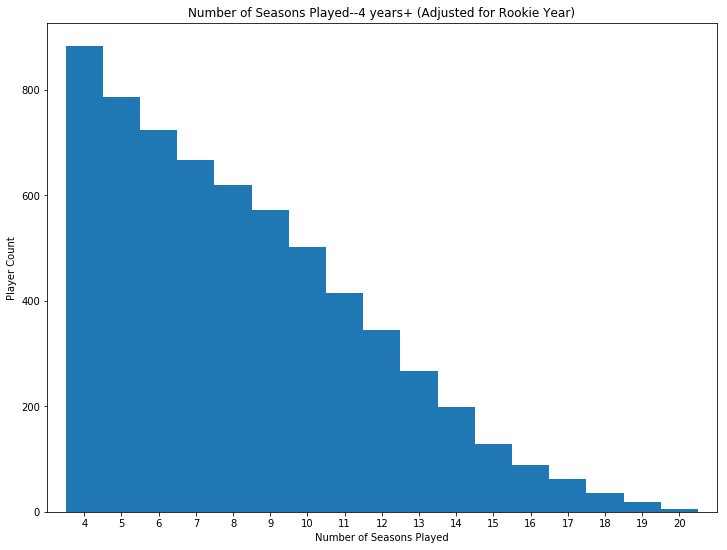

In [45]:
data = joined[joined['Seasons_number']>3]['Seasons_number']
bins = np.arange(22) - 0.5
plt.figure(figsize=(12,9))
plt.hist(data, bins)
plt.xticks(range(4,21))
plt.xlim([3,21])
plt.xlabel('Number of Seasons Played')
plt.ylabel('Player Count')
plt.title('Number of Seasons Played--4 years+ (Adjusted for Rookie Year)')

Plot Average minutes year 4 x-axis, years in league (5-9 in y)

In [5]:
avg_min_year4 = joined.loc[joined['Seasons_number']==4,['Player','MP_pergame']]

In [6]:
#avg_min_year5 = joined.loc[joined['Seasons_number']==5,['Player','MP_pergame']]
#avg_min_year6 = joined.loc[joined['Seasons_number']==6,['Player','MP_pergame']]
#avg_min_year7 = joined.loc[joined['Seasons_number']==7,['Player','MP_pergame']]
#avg_min_year8 = joined.loc[joined['Seasons_number']==8,['Player','MP_pergame']]
#avg_min_year9 = joined.loc[joined['Seasons_number']==9,['Player','MP_pergame']]

In [19]:
max_seasons_played = joined[joined['Seasons_number']>=4].groupby('Player').max()['Seasons_number']

In [20]:
max_seasons_played

Player
A.C. Green              16
A.J. Price               6
Aaron Brooks            11
Aaron Gordon             4
Aaron Gray               7
Aaron McKie             13
Aaron Williams          15
Acie Earl                4
Acie Law                 4
Adam Keefe               9
Adam Morrison            4
Adonal Foyle            12
Adonis Jordan            6
Adreian Payne            4
Adrian Caldwell          9
Adrian Griffin           9
Al Harrington           16
Al Horford              11
Al Jefferson            14
Al Thornton              4
Al-Farouq Aminu          8
Alan Anderson           12
Alan Henderson          12
Alec Burks               7
Aleksandar Radojevic     6
Alex Acker               4
Alex Len                 5
Alexis Ajinca            9
Allan Houston           12
Allen Crabbe             5
                        ..
Walter McCarty          10
Wang Zhizhi              5
Wayman Tisdale          12
Wayne Ellington          9
Wesley Johnson           8
Wesley Matthews      

In [9]:
max(max_seasons_played)

23

In [10]:
mins = avg_min_year4['MP_pergame']

In [21]:
avg_min_year4

Player  MP_pergame
13              A.J. Price        22.4
19            Aaron Brooks        21.8
29            Aaron Gordon        32.9
33              Aaron Gray        13.0
42             Aaron McKie        22.4
53          Aaron Williams        17.1
66               Acie Earl        10.6
70                Acie Law        14.2
79           Adam Morrison         7.8
83            Adonal Foyle        25.1
97           Adreian Payne         8.6
103         Adrian Griffin        18.6
112          Al Harrington        29.8
128             Al Horford        35.1
139           Al Jefferson        35.6
153            Al Thornton        19.5
157        Al-Farouq Aminu        25.6
172         Alan Henderson        30.1
190             Alec Burks        33.3
201             Alex Acker         8.0
209               Alex Len        20.3
228          Allan Houston        33.1
241           Allen Crabbe        28.5
246          Allen Iverson        40.8
260             Alonzo Gee        31.0
286         Alvin Williams        29.2
299      Amar'e Stoudemire        16.7
313           Amir Johnson        14.7
326       Anderson Varejao        27.5
341         Andray Blatche        24.0
...                    ...         ...
9774          Vince Carter        39.8
9804      Vitaly Potapenko        22.7
9825   Vladimir Radmanovic        29.5
9837     Vladimir Stepania        13.2
9843             Von Wafer        19.4
9851         Voshon Lenard        15.8
9865      Wally Szczerbiak        35.3
9886        Walter McCarty        14.4
9897           Wang Zhizhi         7.1
9903       Wayne Ellington        21.3
9918        Wesley Johnson        28.4
9926       Wesley Matthews        34.8
9933         Wesley Person        39.0
9944           Will Barton        28.7
9949            Will Bynum        14.1
9958           Will Conroy         7.2
9982          Willie Green        24.9
10000      Wilson Chandler        33.3
10010         Xavier Henry        21.1
10022     Yakhouba Diawara         7.3
10026             Yao Ming        34.2
10036          Yi Jianlian        17.7
10039           Yinka Dare         6.0
10048          Zach LaVine        27.3
10052        Zach Randolph        34.8
10067            Zan Tabak        17.3
10076        Zaza Pachulia        28.1
10091       Zeljko Rebraca        16.0
10096      Zendon Hamilton        10.3
10106   Zydrunas Ilgauskas        25.7

[883 rows x 2 columns]

In [22]:
type(max_seasons_played)

pandas.core.series.Series

In [24]:
max_frame = max_seasons_played.to_frame()

In [27]:
merged = max_frame.merge(avg_min_year4, left_index=True, right_on='Player')
merged.head()

Seasons_number        Player  MP_pergame
13               6    A.J. Price        22.4
19              11  Aaron Brooks        21.8
29               4  Aaron Gordon        32.9
33               7    Aaron Gray        13.0
42              13   Aaron McKie        22.4

Text(0, 0.5, 'Number of seasons played in NBA')

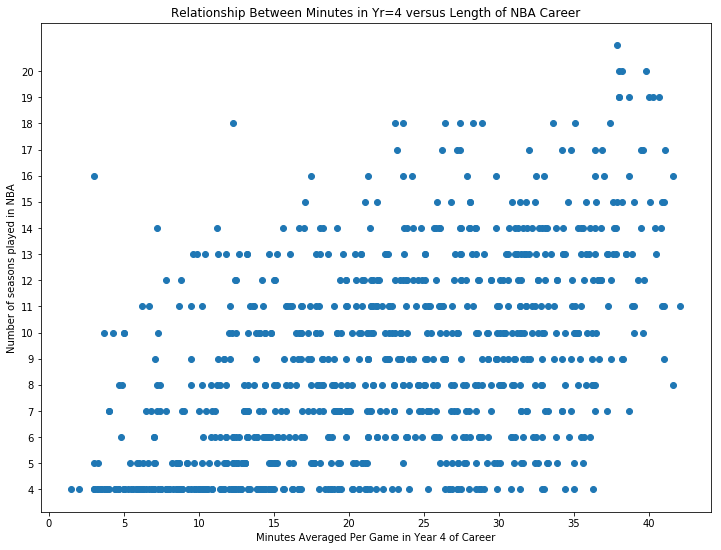

In [39]:
plt.figure(figsize=(12,9))
plt.scatter(merged['MP_pergame'],merged['Seasons_number'])
plt.yticks(range(4,21))
plt.title("Relationship Between Minutes in Yr=4 versus Length of NBA Career")
plt.xlabel('Minutes Averaged Per Game in Year 4 of Career')
plt.ylabel('Number of seasons played in NBA')


Definitely a relationship between the minutes plac

In [36]:
merged[merged['Seasons_number']==16]

Seasons_number            Player  MP_pergame
112               16     Al Harrington        29.8
514               16    Antawn Jamison        37.0
697               16   Antonio McDyess        38.7
848               16       Ben Wallace        24.2
1496              16  Cedric Henderson        17.5
1621              16    Chris Andersen        21.3
3330              16     Erick Dampier        23.6
4908              16         Joe Smith        33.0
6348              16     Manu Ginobili        27.9
7255              16      Nene Hilario         3.0
7849              16     Rashard Lewis        36.4
8778              16      Shawn Marion        41.6
9196              16      Theo Ratliff        32.5

For that weird 3-mpg outlier, in 2005–06, Nenê missed 81 games after suffering a torn ACL in his right knee after just three minutes of action against the San Antonio Spurs in the Denver's season opening game on November 1.  Nene is that outlier

## Correlations 

Looking at the Pearson Correlation coefficient for the entire dataset, it unsurprisingly appears that OWS (Offensive Win Shares) and DWS (Defensive Win Shares) are tightly correlated to Win Shares.  Given that WS is calculated from OWS and DWS (as a combination of the two), we should expect a very high correlation.  

Value over Replacement Player (VORP) is also highly correlated with Win Shares. VORP converts the BPM rate into an estimate of each player's overall contribution to the team, measured vs. what a theoretical "replacement player" would provide, where the "replacement player" is defined as a player on minimum salary or not a normal member of a team's rotation.

So, when I look at the correlation between VORP and BPM, I expect to see a high value.

None of the negative columns were that negative, so I'm just going to look at the most positive values first



In [56]:
correlations  = joined.corr()['WS'].reset_index().sort_values('WS',ascending=False).reset_index().drop('level_0',axis=1)

In [70]:
columns = list(correlations['index'][:10])
columns

['WS',
 'OWS',
 'VORP',
 'DWS',
 'MP_total',
 'PS/G',
 'FG',
 'MP_pergame',
 'GS',
 'FT']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a10d3c8>,
      dtype=object)

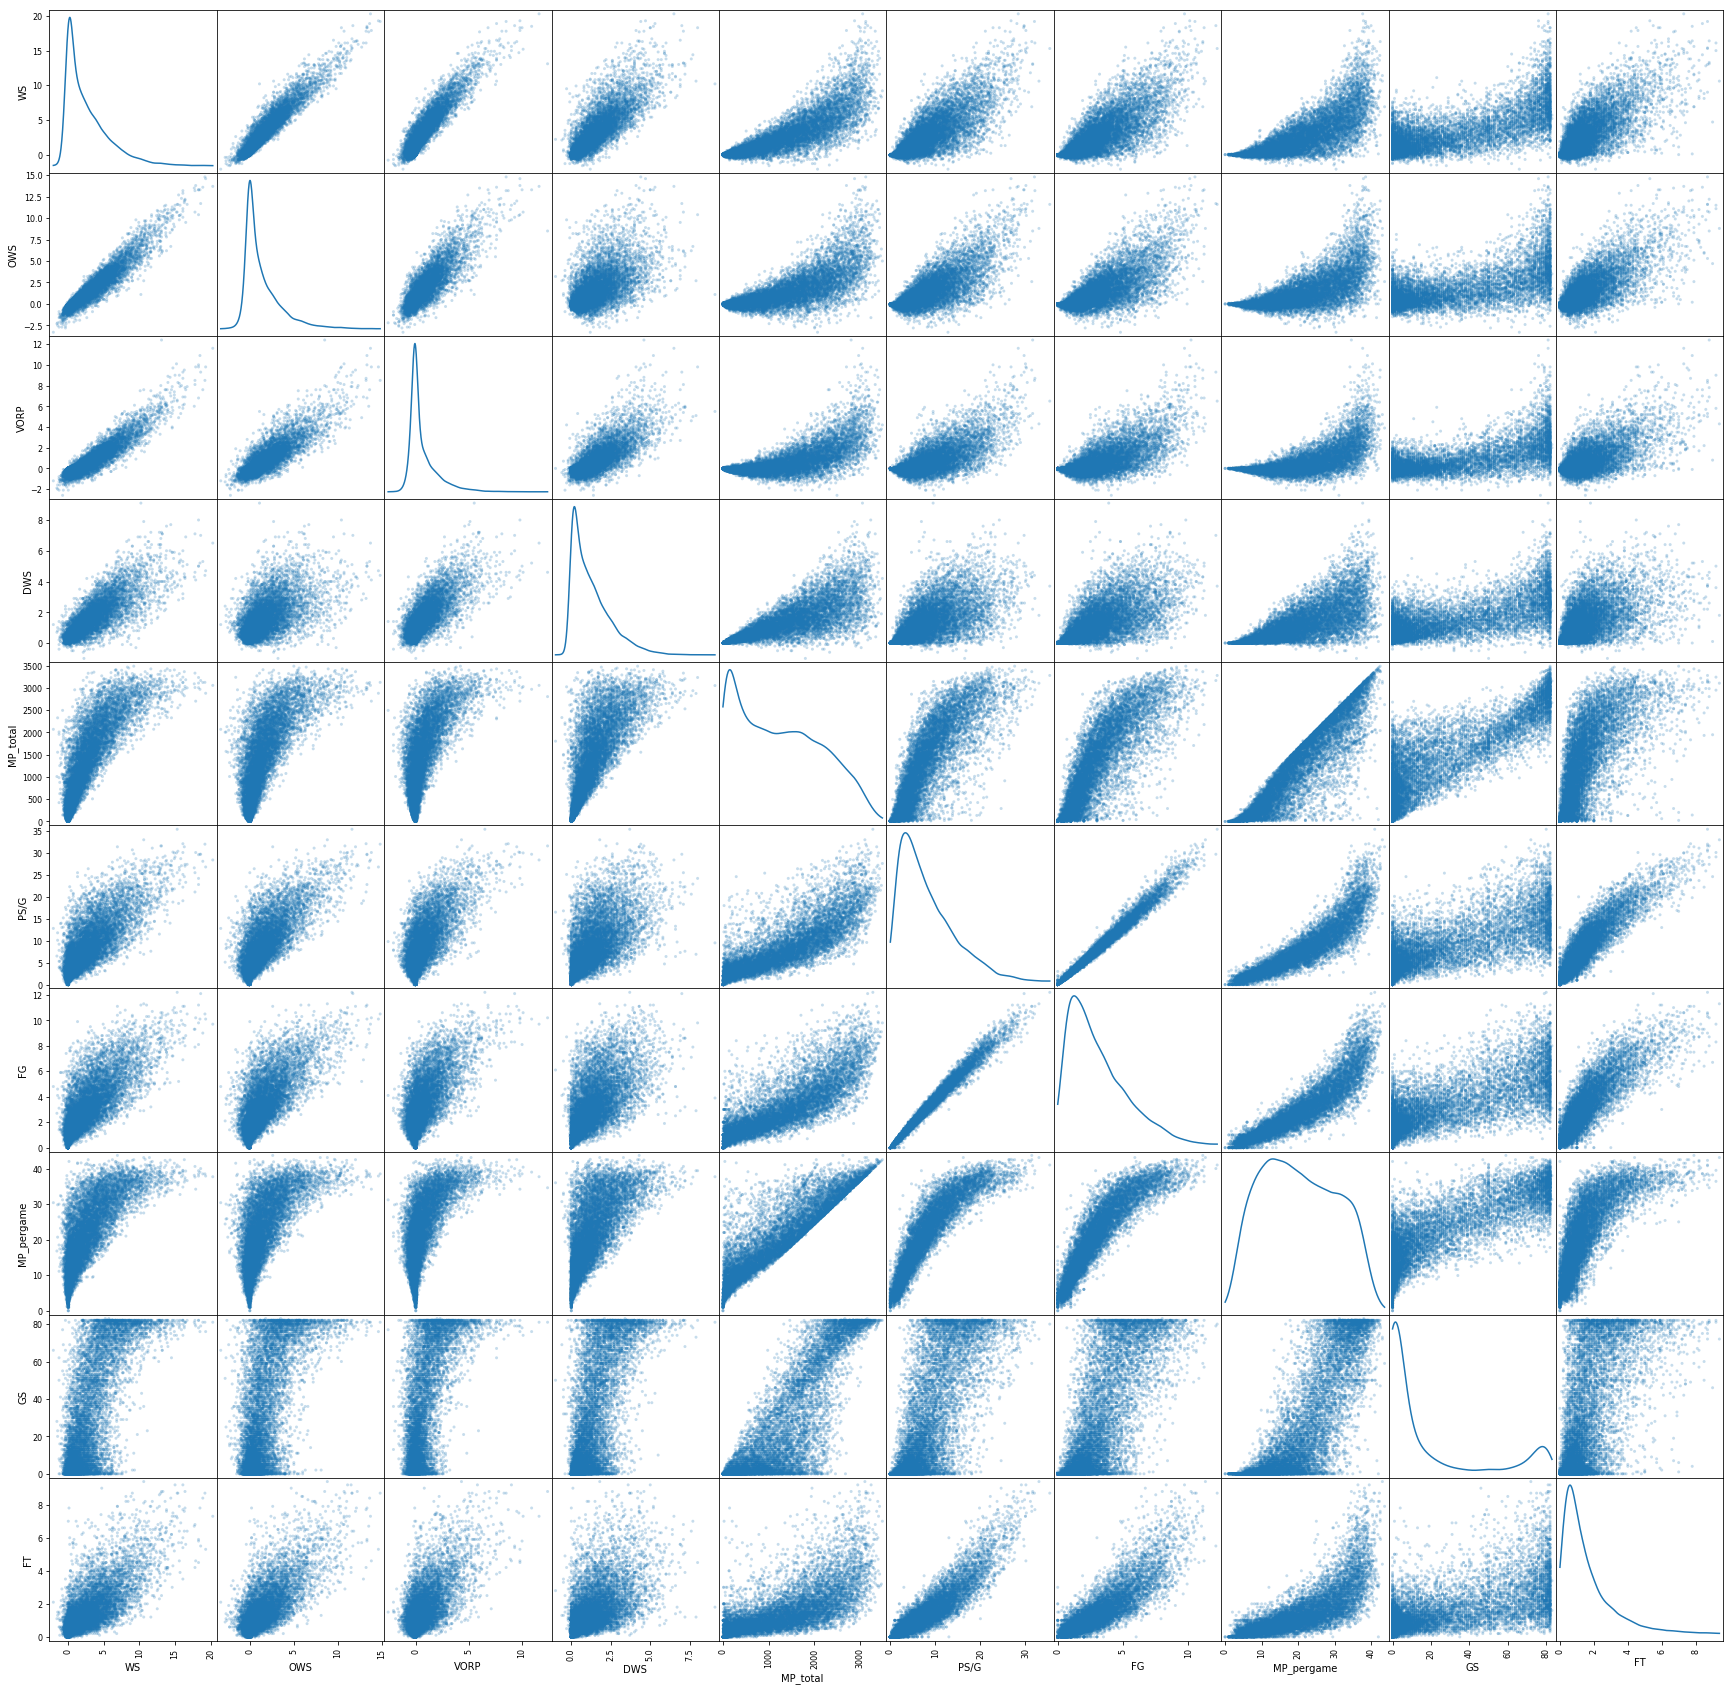

In [69]:
filtered = joined[columns]

scatter_matrix(filtered,alpha=.25, diagonal='kde',figsize=(30,30))

Let's look at total minutes played as a proxy

In [71]:
correlations  = joined.corr()['MP_total'].reset_index().sort_values('MP_total',ascending=False).reset_index().drop('level_0',axis=1)

In [72]:
correlations

index  MP_total
0         MP_total  1.000000
1       MP_pergame  0.907876
2               GS  0.862683
3                G  0.853867
4               WS  0.826870
5               FG  0.825686
6             PS/G  0.822306
7              FGA  0.813708
8              DWS  0.785639
9               2P  0.764346
10             2PA  0.758602
11             OWS  0.730135
12             TOV  0.727219
13             STL  0.693922
14              FT  0.693064
15             FTA  0.685230
16             DRB  0.682621
17            VORP  0.677890
18              PF  0.643504
19             TRB  0.634610
20             AST  0.606700
21             BPM  0.595767
22            OBPM  0.572938
23             PER  0.498253
24              3P  0.477513
25             3PA  0.475697
26             ORB  0.435827
27           WSp48  0.391163
28             TS%  0.371034
29             FT%  0.364868
30             BLK  0.358655
31            eFG%  0.320344
32            AST%  0.297152
33            USG%  0.293935
34             FG%  0.280946
35             2P%  0.280063
36             3P%  0.277771
37            DBPM  0.258553
38  Seasons_number  0.149373
39            STL%  0.057876
40            DRB%  0.054119
41            3PAr  0.049061
42             Age  0.028088
43             FTr -0.012119
44          Season -0.016865
45            TRB% -0.022156
46            BLK% -0.028139
47            ORB% -0.118640
48            TOV% -0.183544

In [76]:
columns = list(correlations['index'][2:13])
columns

['GS', 'G', 'WS', 'FG', 'PS/G', 'FGA', 'DWS', '2P', '2PA', 'OWS', 'TOV']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a33eb69e8>,
      dtype=object)

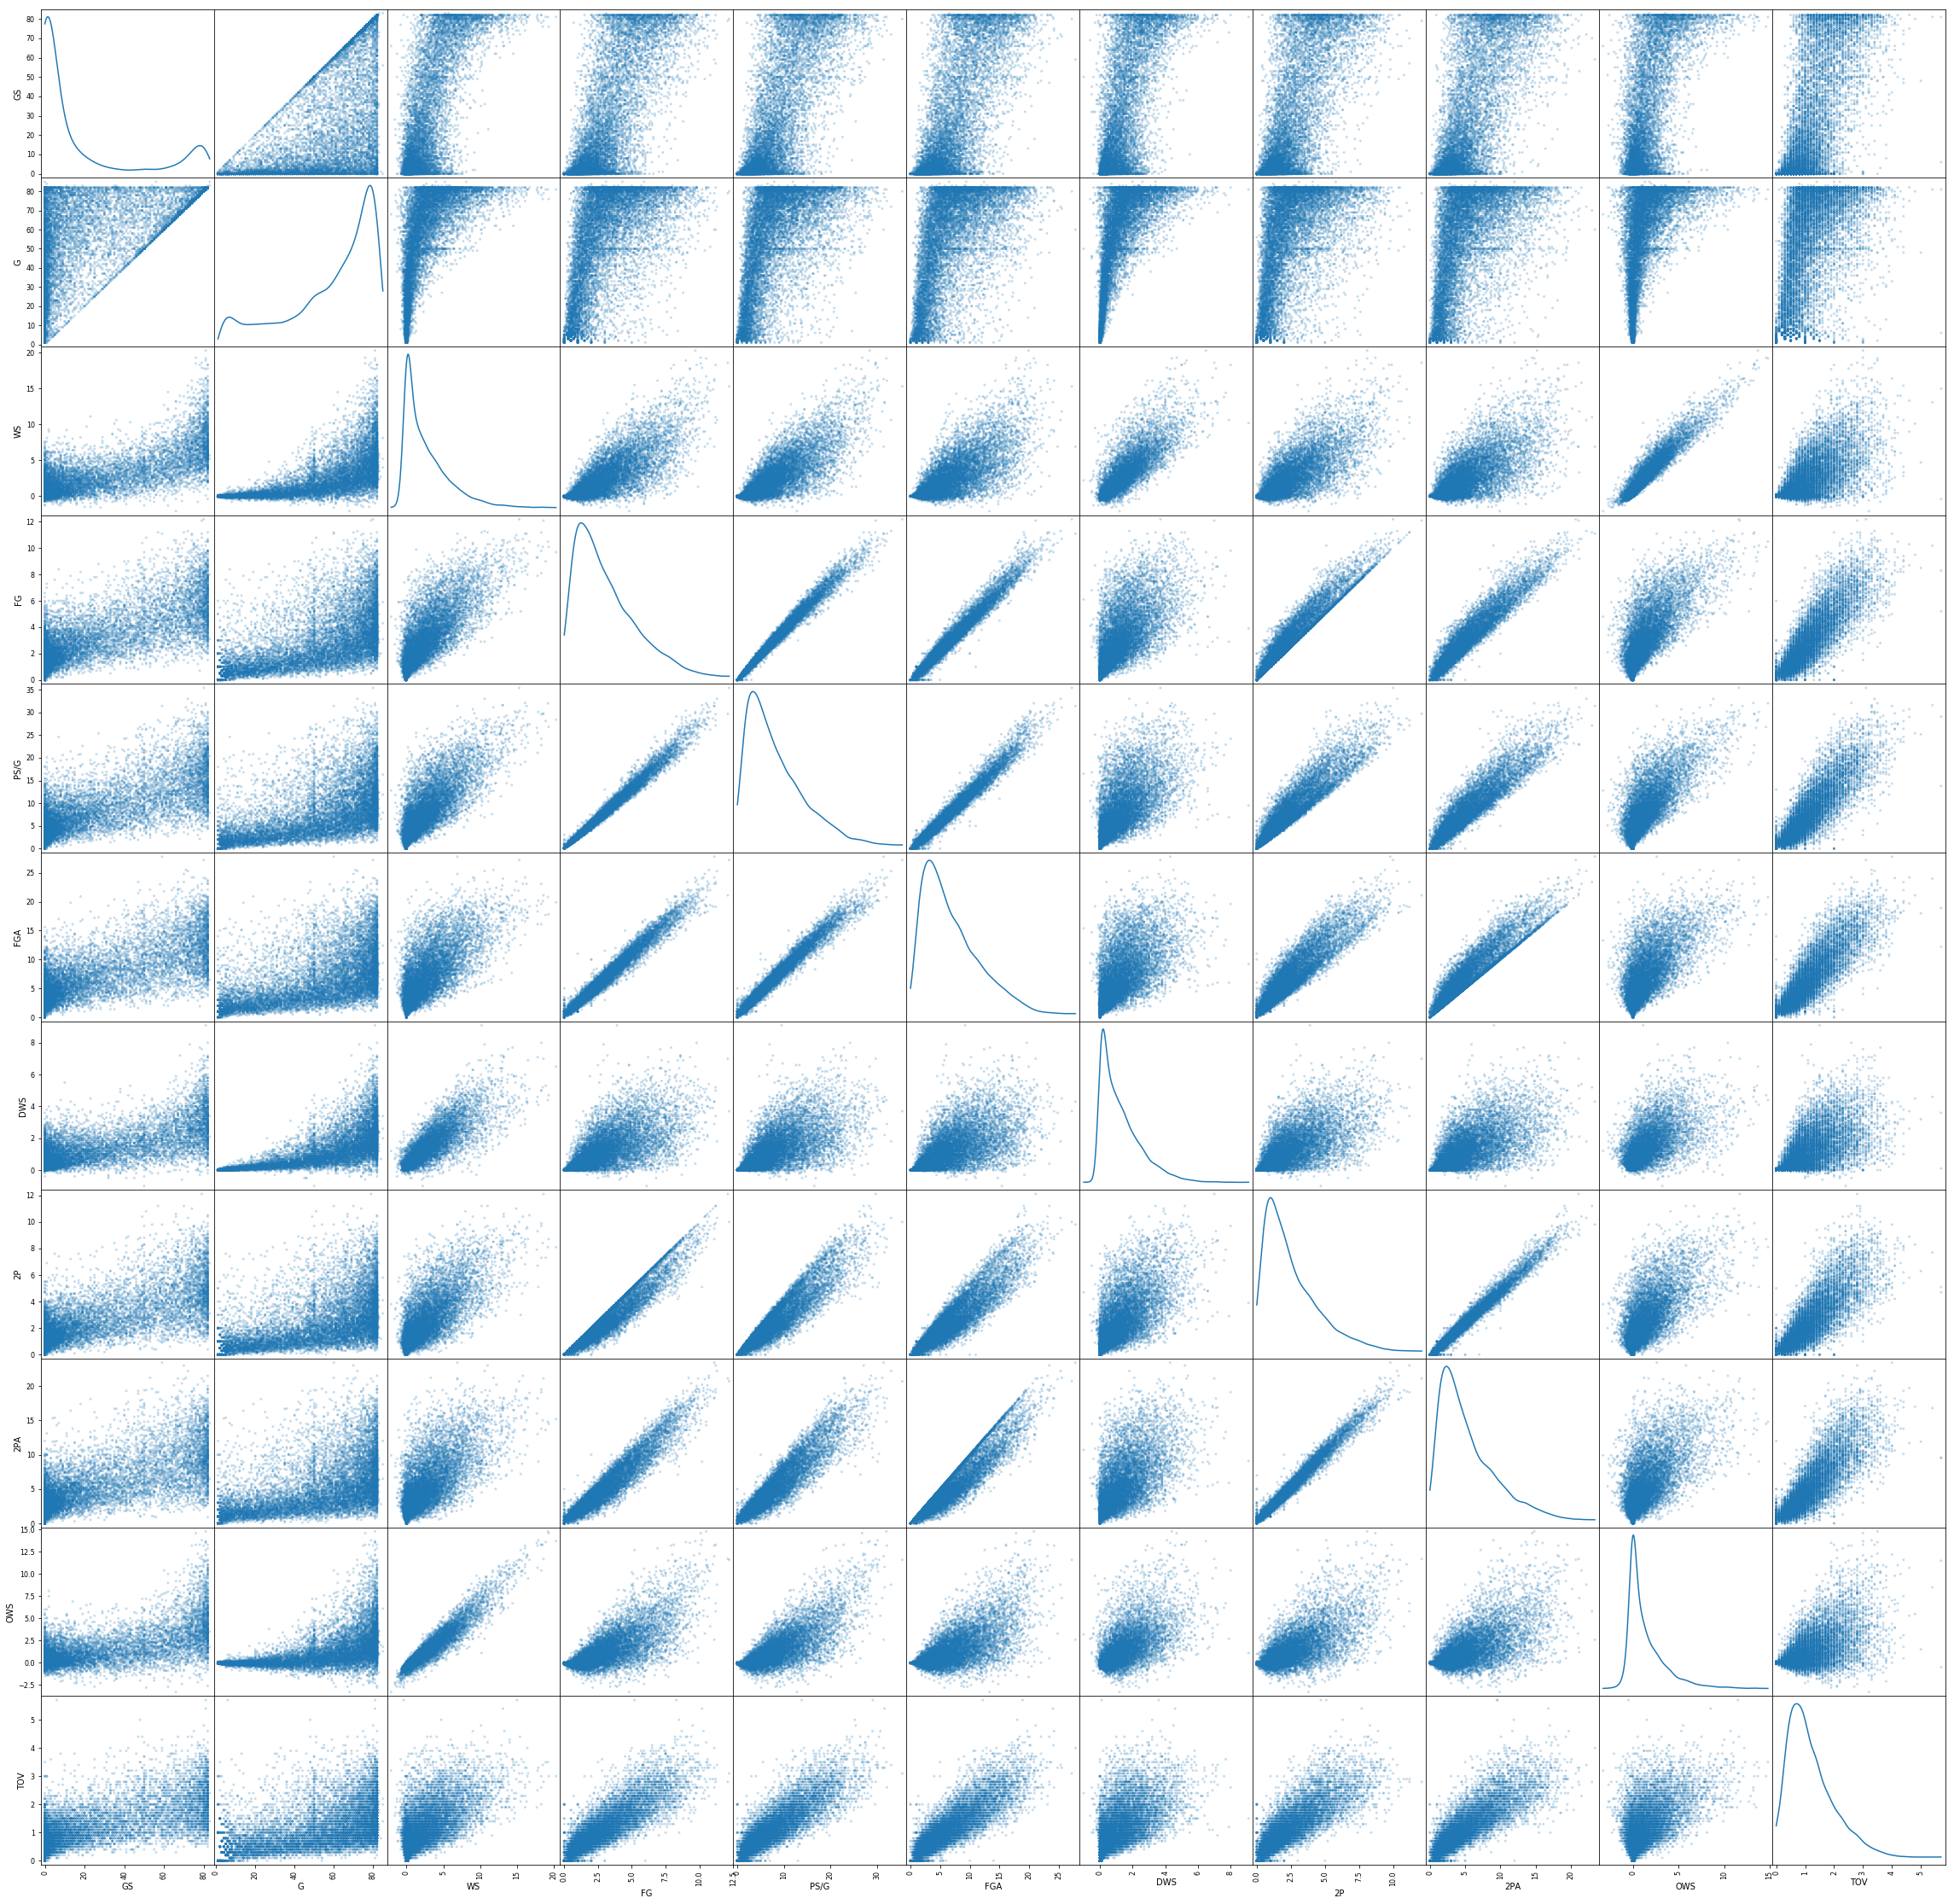

In [77]:
filtered = joined[columns]

scatter_matrix(filtered,alpha=.25, diagonal='kde',figsize=(40,40))

In [78]:
list(correlations['index']

['MP_total',
 'MP_pergame',
 'GS',
 'G',
 'WS',
 'FG',
 'PS/G',
 'FGA',
 'DWS',
 '2P',
 '2PA',
 'OWS',
 'TOV',
 'STL',
 'FT',
 'FTA',
 'DRB',
 'VORP',
 'PF',
 'TRB',
 'AST',
 'BPM',
 'OBPM',
 'PER',
 '3P',
 '3PA',
 'ORB',
 'WSp48',
 'TS%',
 'FT%',
 'BLK',
 'eFG%',
 'AST%',
 'USG%',
 'FG%',
 '2P%',
 '3P%',
 'DBPM',
 'Seasons_number',
 'STL%',
 'DRB%',
 '3PAr',
 'Age',
 'FTr',
 'Season',
 'TRB%',
 'BLK%',
 'ORB%',
 'TOV%']

In [81]:
playercountdemo = demographic.groupby('name').count()['year_start']

In [82]:
playercountdemo[playercountdemo>1]

name
Bill Bradley        2
Bob Duffy           2
Bobby Wilson        2
Cedric Henderson    2
Dan Anderson        2
Don Smith           2
Freddie Lewis       2
George Johnson      3
Jack Turner         2
Jim Paxson          2
Ken Johnson         2
Mark Davis          2
Matt Guokas         2
Michael Smith       2
Mike Davis          2
Roger Brown         2
Sam Smith           2
Sam Williams        2
Tony Jackson        2
Tony Mitchell       2
Name: year_start, dtype: int64

Only collission from the above list is Tony Mitchell--two forwards in the league in 2014 by that name.

In [84]:
seasonal[seasonal['Player']=='Tony Mitchell']

Player Pos  Age   Tm   G  MP_total   PER   TS%   3PAr    FTr  \
8072  Tony Mitchell  PF   21  DET  21        79  18.1  0.54  0.083  1.583   

      ...     FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  PS/G  
8072  ...   0.579  0.7  0.5  1.2  0.1  0.3  0.1  0.2  0.4   1.0  

[1 rows x 52 columns]

In [85]:
joined[joined['Player']=='Tony Mitchell']

Player Pos  Age   Tm   G  MP_total   PER   TS%   3PAr    FTr  \
9419  Tony Mitchell  PF   21  DET  21        79  18.1  0.54  0.083  1.583   
9420  Tony Mitchell  PF   21  DET  21        79  18.1  0.54  0.083  1.583   

           ...        ORB  DRB  TRB  AST  STL  BLK  TOV   PF  PS/G  \
9419       ...        0.7  0.5  1.2  0.1  0.3  0.1  0.2  0.4   1.0   
9420       ...        0.7  0.5  1.2  0.1  0.3  0.1  0.2  0.4   1.0   

      Seasons_number  
9419               1  
9420               1  

[2 rows x 53 columns]

In [86]:
joined[joined['Player']=='Michael Redd']

Player Pos  Age   Tm   G  MP_total   PER    TS%   3PAr    FTr  \
6904  Michael Redd  SG   21  MIL   6        35   3.4  0.300  0.158  0.316   
6905  Michael Redd  SG   22  MIL  67      1417  20.0  0.581  0.325  0.189   
6906  Michael Redd  SG   23  MIL  82      2316  21.0  0.590  0.428  0.191   
6907  Michael Redd  SG   24  MIL  82      3021  19.9  0.544  0.252  0.306   
6908  Michael Redd  SG   25  MIL  75      2848  18.3  0.536  0.207  0.305   
6909  Michael Redd  SG   26  MIL  80      3130  21.2  0.574  0.272  0.377   
6910  Michael Redd  SF   27  MIL  53      2036  22.3  0.586  0.299  0.406   
6911  Michael Redd  SG   28  MIL  72      2702  18.8  0.559  0.289  0.394   
6912  Michael Redd  SG   29  MIL  33      1203  17.9  0.566  0.349  0.294   
6913  Michael Redd  SG   30  MIL  18       492  12.1  0.444  0.282  0.310   
6914  Michael Redd  SG   31  MIL  10       134   9.7  0.470  0.378  0.089   
6915  Michael Redd  SG   32  PHO  51       770  13.9  0.511  0.367  0.308   

           ...        ORB  DRB  TRB  AST  STL  BLK  TOV   PF  PS/G  \
6904       ...        0.5  0.2  0.7  0.2  0.2  0.0  0.2  0.3   2.2   
6905       ...        1.1  2.2  3.3  1.4  0.6  0.1  0.9  1.4  11.4   
6906       ...        1.2  3.3  4.5  1.4  1.2  0.2  0.9  1.7  15.1   
6907       ...        1.4  3.5  5.0  2.3  1.0  0.1  1.4  1.9  21.7   
6908       ...        1.0  3.2  4.2  2.3  0.8  0.1  1.8  2.0  23.0   
6909       ...        1.0  3.3  4.3  2.9  1.2  0.1  2.1  2.0  25.4   
6910       ...        0.8  2.9  3.7  2.3  1.2  0.2  2.3  1.5  26.7   
6911       ...        1.2  3.1  4.3  3.4  0.9  0.2  2.5  1.7  22.7   
6912       ...        0.7  2.5  3.2  2.7  1.1  0.1  1.6  1.4  21.2   
6913       ...        0.6  2.4  3.0  2.2  1.1  0.1  0.8  1.3  11.9   
6914       ...        0.0  0.8  0.8  1.2  0.2  0.1  0.4  0.4   4.4   
6915       ...        0.3  1.2  1.5  0.6  0.3  0.0  0.7  0.6   8.2   

      Seasons_number  
6904               1  
6905               2  
6906               3  
6907               4  
6908               5  
6909               6  
6910               7  
6911               8  
6912               9  
6913              10  
6914              11  
6915              12  

[12 rows x 53 columns]